# aside_DATA_remake_xtest.ipynb
- xtrain 과 동일한 순서로 

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import multiprocessing as mp

from parse import *
from multiprocessing import Pool

num_cores = mp.cpu_count()               # cpu의 코어 수를 반환
print(f"THIS CPU CORES ARE .. = {num_cores} CORES!")        # CPU CORES = 16 CORES!

THIS CPU CORES ARE .. = 16 CORES!


In [3]:
"""
# 기본 DIR 구조를 입력한다. - _assets 폴더 제외!
# /content/drive/My Drive/Colab Notebooks/
# dir_base = '/content/drive/My Drive/Colab Notebooks/competition/''
"""
dir_base = '/home/yk/0325_Starcraft/competition/'

raw      = 'c03_starcraft_prediction/data_raw/'
remake   = 'c03_starcraft_prediction/data_remake/'
submit   = 'c03_starcraft_prediction/data_submit/'

assets = '/home/yk/0325_Starcraft/competition/_assets'

filename_remake_final = 'df_xtest_remake_final.csv'        # 'df_xtest_remake.csv'

In [4]:
"""
# 모듈 import를 위한 SYS.PATH 설정!
"""
import os
import sys

if not dir_base in sys.path:
    sys.path.insert(0, dir_base)
    print(f"***'{dir_base}' has set in SYS.PATH! ***")    
    print()
    
for i, item in enumerate(sys.path,1):
    print(f"{i:02}.{item}")

***'/home/yk/0325_Starcraft/competition/' has set in SYS.PATH! ***

01./home/yk/0325_Starcraft/competition/
02./home/yk/0325_Starcraft/competition/c03_starcraft_prediction
03./home/yk/anaconda3/lib/python37.zip
04./home/yk/anaconda3/lib/python3.7
05./home/yk/anaconda3/lib/python3.7/lib-dynload
06.
07./home/yk/anaconda3/lib/python3.7/site-packages
08./home/yk/anaconda3/lib/python3.7/site-packages/IPython/extensions
09./home/yk/.ipython


### 사용함수의 정의

In [5]:
from tqdm import tqdm

from _assets.modules import ( __doc__, 
                                show_ls, 
                                show_infoDF_from,
                                histit,
                                hist_it,
                                plot_it,
                                get_random_n_array,
                                get_basic_df,
                                get_counts_dict_fromDF,
                            )


# OS 화일 및 DF 정보조회를 위한 탐색 모듈



## 이벤트 Detail 탐색을 위해 각 이벤트 딕트를 만든다
- df_train 을 읽어들인다 = 모든 분류소스의 오리지널 화일
- 이벤트 탐색을 위한 counts 이벤트 딕트를 만든다, 
- 각 이벤트를카운트한 시리즈

In [6]:
show_ls(dir_base + remake)

False
DIR_TARGET=/home/yk/0325_Starcraft/competition/c03_starcraft_prediction
/home/yk/0325_Starcraft/competition/c03_starcraft_prediction/data_remake/
----------------------------------------
  01. .ipynb_checkpoints
  02. accumujated_winning_rate_per_time.csv
  03. accumulated_winning_rate_per_time.csv
  04. df_new_rate04_correct.csv
  05. df_win_rate_every_10sec.csv
  06. df_win_rate_every_20sec.csv
  07. df_win_rate_every_40sec.csv
  08. df_xtest_remake.csv
  09. df_xtrain_remake.csv
  10. df_xtrain_remake_final.csv
  11. df_ytrain_remake.csv


In [7]:
%%time
df_test = pd.read_csv(dir_base + raw + 'test.csv')
df_xtest = pd.read_csv(dir_base + remake + 'df_xtest_remake.csv')
df_xtest.index = df_xtest['game_id'].copy()

CPU times: user 18 s, sys: 1.46 s, total: 19.4 s
Wall time: 17.5 s


In [8]:
show_infoDF_from(df_test)
show_infoDF_from(df_xtest)

*** DATA SHAPE = [ 28,714,849 x 6 ]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28714849 entries, 0 to 28714848
Data columns (total 6 columns):
game_id           int64
time              float64
player            int64
species           object
event             object
event_contents    object
dtypes: float64(1), int64(2), object(3)
memory usage: 1.3+ GB
None

            game_id          time        player
count  2.871485e+07  2.871485e+07  2.871485e+07
mean   4.727190e+04  4.279015e+00  4.996731e-01
std    4.858715e+03  2.711958e+00  4.999999e-01
min    3.887200e+04  0.000000e+00  0.000000e+00
25%    4.305700e+04  2.120000e+00  0.000000e+00
50%    4.727100e+04  4.150000e+00  0.000000e+00
75%    5.149800e+04  6.360000e+00  1.000000e+00
max    5.565800e+04  1.059000e+01  1.000000e+00

*** DATA SHAPE = [ 16,787 x 27 ]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16787 entries, 0 to 16786
Data columns (total 27 columns):
game_id                    16787 non-null int64
P0_speci

In [9]:
%%time
"""
# 이벤트 분류를 위한 counts_dict 를 만든다.
# CPU times: user 75.4 ms, sys: 2.81 ms, total: 78.2 ms
# Wall time: 77.6 ms
    """
counts = get_counts_dict_fromDF(df_test)

CPU times: user 39.2 s, sys: 911 ms, total: 40.1 s
Wall time: 27 s


## Total time laps = df_time
- df_test = raw + test.csv
- df_xtest = ramake + df_xtest_remake.csv

In [10]:
df_test

,game_id,time,player,species,event,event_contents
0,38872,0.00,0,P,Camera,"at (22.25, 81.5078125)"
1,38872,0.00,1,P,Camera,"at (120.25, 153.83984375)"
2,38872,0.01,1,P,Selection,['Nexus [3100001]']
3,38872,0.01,1,P,Ability,(15E0) - TrainProbe
4,38872,0.01,1,P,AddToControlGroup,NaN
...,...,...,...,...,...,...
28714844,55658,4.54,1,T,Right Click,"Location: (120.584228515625, 56.930419921875, ..."
28714845,55658,4.54,0,Z,Camera,"at (70.9921875, 117.65234375)"
28714846,55658,4.54,1,T,Right Click,"Location: (122.146728515625, 55.52099609375, 3..."
28714847,55658,4.54,1,T,Right Click,"Location: (123.6767578125, 54.140625, 33215)"


In [11]:
%%time
"""
# df_time 데이터를 만든다. = 유니크 게임 갯수 *** DATA SHAPE = [ 38,872 x 1 ]
"""

df_time = pd.DataFrame(columns=['game_id'])       # 빈 df 선언
df_time['game_id'] = df_test['game_id'].unique() # 빈 df 에 'game_id 를 채운다
df_time['time'] = np.array(df_test[df_test.shift(-1).game_id != df_test.game_id].time)

CPU times: user 5.47 s, sys: 1.45 s, total: 6.92 s
Wall time: 1.91 s


In [12]:
df_time.index = df_time['game_id'].copy()
df_time.shape                         # (38872, 2) *** DATA SHAPE = [ 38,872 x 2 ]
df_time

,game_id,time
game_id,,
38872,38872,7.06
38873,38873,6.07
38874,38874,4.41
38875,38875,7.58
38876,38876,2.50
...,...,...
55654,55654,6.14
55655,55655,9.58
55656,55656,6.24


In [13]:
"""
# x_train 데이터 2번째 열에 Insert 시킨다
# df_1['old_index'] = df_1.index    # placed last
"""
pos_idx = 1                       # insert position
column = 'time'                   # name of column
value = df_time['time']    # values

df_xtest.insert(pos_idx, column=column, value=value)

In [14]:
df_xtest.shape    # (16,787, 28)
df_xtest

,game_id,time,P0_species,P0_Ability,P0_AddToControlGroup,P0_Camera,P0_ControlGroup,P0_GetControlGroup,P0_Right Click,P0_Selection,...,P1_Selection,P1_SetControlGroup,delta_Ability,delta_AddToControlGroup,delta_Camera,delta_ControlGroup,delta_GetControlGroup,delta_Right Click,delta_Selection,delta_SetControlGroup
0,38872,NaN,1,31.0,1.0,232.0,0.0,9.0,241.0,52.0,...,41.0,0.0,-7.0,-3.0,-235.0,0.0,-34.0,119.0,11.0,5.0
1,38873,NaN,2,34.0,0.0,200.0,4.0,18.0,51.0,114.0,...,19.0,5.0,6.0,-1.0,54.0,4.0,-104.0,-17.0,95.0,-5.0
2,38874,NaN,0,33.0,0.0,245.0,0.0,63.0,79.0,42.0,...,36.0,5.0,4.0,0.0,25.0,0.0,-363.0,-29.0,6.0,2.0
3,38875,NaN,0,95.0,8.0,515.0,0.0,255.0,218.0,123.0,...,99.0,2.0,37.0,7.0,158.0,0.0,231.0,-104.0,24.0,7.0
4,38876,NaN,2,7.0,2.0,129.0,0.0,387.0,30.0,25.0,...,35.0,1.0,-1.0,2.0,-32.0,0.0,386.0,23.0,-10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16782,55654,NaN,2,37.0,2.0,258.0,0.0,693.0,136.0,186.0,...,108.0,14.0,-16.0,-13.0,-60.0,0.0,178.0,-13.0,78.0,-8.0
16783,55655,NaN,2,62.0,0.0,810.0,0.0,217.0,158.0,317.0,...,103.0,0.0,-13.0,-2.0,172.0,0.0,167.0,-16.0,214.0,7.0
16784,55656,NaN,1,14.0,0.0,330.0,0.0,0.0,106.0,67.0,...,52.0,0.0,-22.0,0.0,2.0,-2.0,-28.0,-145.0,15.0,1.0
16785,55657,NaN,0,7.0,0.0,20.0,0.0,0.0,8.0,5.0,...,23.0,1.0,2.0,0.0,-45.0,0.0,-105.0,-8.0,-18.0,1.0


## P0,P1 Null 값 및 delta = df_null

In [15]:
%%time
"""
# df_null 데이터를 만든다. = 유니크 게임 갯수 *** DATA SHAPE = [ 38,872 x 1 ]
"""

df_null = pd.DataFrame(columns=['game_id'])       # 빈 df 선언
df_null['game_id'] = df_test['game_id'].unique() # 빈 df 에 'game_id 를 채운다


CPU times: user 628 ms, sys: 47.5 ms, total: 676 ms
Wall time: 94.7 ms


In [16]:
cols_null = ['GetControlGroup','SetControlGroup','AddToControlGroup','ControlGroup']

df_null['P0_null_total'] =  df_xtest['P0_GetControlGroup'] + \
                            df_xtest['P0_SetControlGroup'] + \
                            df_xtest['P0_AddToControlGroup'] + \
                            df_xtest['P0_ControlGroup']

df_null['P1_null_total'] =  df_xtest['P1_GetControlGroup'] + \
                            df_xtest['P1_SetControlGroup'] + \
                            df_xtest['P1_AddToControlGroup'] + \
                            df_xtest['P1_ControlGroup']  

df_null['delta_null_total'] = df_null['P0_null_total'] - \
                              df_null['P1_null_total']

In [17]:
df_null.index = df_null['game_id']
df_null.shape     # (38872, 4)
df_null

,game_id,P0_null_total,P1_null_total,delta_null_total
game_id,,,,
38872,38872,15.0,47.0,-32.0
38873,38873,22.0,128.0,-106.0
38874,38874,70.0,431.0,-361.0
38875,38875,272.0,27.0,245.0
38876,38876,391.0,2.0,389.0
...,...,...,...,...
55654,55654,701.0,544.0,157.0
55655,55655,224.0,52.0,172.0
55656,55656,1.0,30.0,-29.0


## Selection 에서 Null 값 count = df_select_null
- unique = 'game-id' = 16787 를 프레임에 맞춘다
- 행 갯수가 16,787  로 맞춰져 있는지 확인! = NaN값으로 채워넣음!

In [18]:
"""
#  Select 중에 Null 값이 있는 데이터 갯수는 811,722, game_id 별로 카운트 한다
[]    811772
Name: event_contents, dtype: int64       
"""
total_select_null = df_test['game_id'][
                                    (df_test['event'] == 'Selection') &
                                    (df_test['event_contents'].str.len() == 2)    # '[]'
                                ].value_counts()

P0_select_null =df_test['game_id'][
                        (df_test['player'] == 0)&
                        (df_test['event'] == 'Selection') &
                        (df_test['event_contents'].str.len() == 2)
                    ].value_counts()

P1_select_null =df_test['game_id'][
                        (df_test['player'] == 1)&
                        (df_test['event'] == 'Selection') &
                        (df_test['event_contents'].str.len() == 2)
                    ].value_counts()

In [19]:
type(P0_select_null)    # pandas.core.series.Series
P0_select_null.shape    # (14880,)
P1_select_null.shape    # (14888,)

(14888,)

In [20]:
df_P0_select_null = pd.DataFrame(dict(P0_select_null).items(), columns=['game_id', 'P0_select_null'])
df_P0_select_null['P0_select_null'] = df_P0_select_null['P0_select_null'].astype(np.float64)
df_P0_select_null = df_P0_select_null.sort_values(by='game_id')
df_P0_select_null.index = df_P0_select_null['game_id']
df_P0_select_null.shape # (34690, 2)
df_P0_select_null

,game_id,P0_select_null
game_id,,
38872,38872,4.0
38873,38873,7.0
38874,38874,1.0
38875,38875,9.0
38879,38879,36.0
...,...,...
55653,55653,16.0
55654,55654,24.0
55655,55655,7.0


In [21]:
df_P1_select_null = pd.DataFrame(dict(P1_select_null).items(), columns=['game_id', 'P1_select_null'])
df_P1_select_null['P1_select_null'] = df_P1_select_null['P1_select_null'].astype(np.float64)
df_P1_select_null = df_P1_select_null.sort_values(by='game_id')
df_P1_select_null.index = df_P1_select_null['game_id']
df_P1_select_null.shape # (34690, 2)
df_P1_select_null

,game_id,P1_select_null
game_id,,
38872,38872,3.0
38873,38873,1.0
38874,38874,2.0
38875,38875,11.0
38878,38878,10.0
...,...,...
55653,55653,2.0
55654,55654,4.0
55655,55655,11.0


In [22]:
# df_select_null_total 을 만든다.

df_total_select_null = pd.DataFrame(dict(total_select_null).items(), columns=['game_id', 'total_select_null'])
df_total_select_null['total_select_null'] = df_total_select_null['total_select_null'].astype(np.float64)
df_total_select_null = df_total_select_null.sort_values(by='game_id')
df_total_select_null.index = df_total_select_null['game_id']
df_total_select_null.shape # (34690, 2)
df_total_select_null

,game_id,total_select_null
game_id,,
38872,38872,7.0
38873,38873,8.0
38874,38874,3.0
38875,38875,20.0
38878,38878,10.0
...,...,...
55653,55653,18.0
55654,55654,28.0
55655,55655,18.0


## Start Concatenating 
- Pandas.concat doc = https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
- 데이터 사이언스 스쿨 = https://bit.ly/2UQiaYy

In [23]:
cols = [
        'P0_select_null',
        'P1_select_null',
        'total_select_null',
    ]

dfs = [df_P0_select_null, df_P1_select_null, df_total_select_null]

In [24]:
df_select_null = pd.concat(dfs, axis=1, join='outer')
df_select_null = df_select_null[cols].fillna(0.0)

df_select_null['delta_select_null'] = df_select_null['P0_select_null'] - df_select_null['P1_select_null']
df_select_null

,P0_select_null,P1_select_null,total_select_null,delta_select_null
game_id,,,,
38872,4.0,3.0,7.0,1.0
38873,7.0,1.0,8.0,6.0
38874,1.0,2.0,3.0,-1.0
38875,9.0,11.0,20.0,-2.0
38878,0.0,10.0,10.0,-10.0
...,...,...,...,...
55653,16.0,2.0,18.0,14.0
55654,24.0,4.0,28.0,20.0
55655,7.0,11.0,18.0,-4.0


## df_xtest 그대로, 나머지를 Merge 시킨다
- df_time (1 칼럼)             ... time 
- df_null (3 칼럼)             ... total_P0, total_P1_null, delta_total 
- df_null_selection (3 칼럼)   ... total, P0, P1

> 1. df_position (2칼럼)          ... 15개 주요 starting points index (가능할까?)
> 1. df_produce_attack (3칼럼)    .... produce, attack, R/A rate (Avility 에서 counts)
> 1. df_early_finish (3칼럼)      .... 3 index = 1분이내, 1분이상 (df_timeband=누적승률 시간대로 변경)

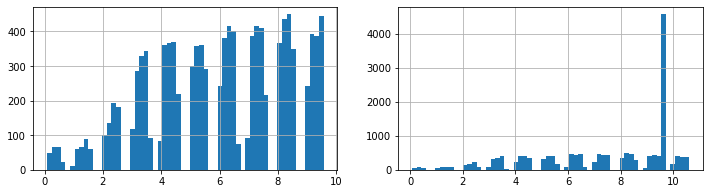

In [25]:
plt.figure(figsize=(12,3))

plt.subplot(121)
plt.hist(df_time.time[df_time.time < 9.58], bins =60)
plt.grid()

plt.subplot(122)
plt.hist(df_time.time[df_time.time > 0], bins =60)
plt.grid()

plt.show()

## Ability 중 'Train' event count
- 게임별 훈련 이벤트는 거의 필수적으로 존재한다
- 'Train'이 포함된 이벤트를 P0 P1 으로 카운트를 해서 칼럼을 추가한다.
- Train 이벤트가 양쪽 모두 없는 게임이 존재한다 == 뭔가 잘못된 극소수 게임이 존재함

In [26]:
%%time
countAll_train = df_test.game_id[(df_test.event == 'Ability') &
                     (
                         (df_test.event_contents.str.contains('Train')) |
                         (df_test.event_contents.str.contains('Morph'))
                     )
                ].value_counts()


countP0_train = df_test.game_id[(df_test.event == 'Ability') &
                     (
                         (df_test.event_contents.str.contains('Train')) |
                         (df_test.event_contents.str.contains('Morph'))
                     ) &
                     (df_test.player == 0)
                ].value_counts()


countP1_train = df_test.game_id[(df_test.event == 'Ability') &
                     (
                         (df_test.event_contents.str.contains('Train')) |
                         (df_test.event_contents.str.contains('Morph'))
                     ) &
                     (df_test.player == 1)
                ].value_counts()

CPU times: user 1min 42s, sys: 3.43 s, total: 1min 46s
Wall time: 1min 17s


In [27]:
countP1_train

40681    69
55191    69
42234    65
50472    64
41566    63
         ..
46555     1
50845     1
46602     1
47478     1
49162     1
Name: game_id, Length: 16727, dtype: int64

In [28]:
"""
# 갯수 카운트 ... P0=(38717,) P1=(38715,) ALL=(38858,)
# ['train_all', 'train_P0', 'train_P1',]
"""

df_train_P0 = pd.DataFrame(countP0_train)
df_train_P0 = df_train_P0.rename(columns={'game_id' : 'train_P0'})
df_train_P0.insert(0,'game_id', df_train_P0.index.values)
df_train_P0.index = df_train_P0['game_id'].copy()

df_train_P1 = pd.DataFrame(countP1_train)
df_train_P1 = df_train_P1.rename(columns={'game_id' : 'train_P1'})
df_train_P1.insert(0,'game_id', df_train_P1.index.values)
df_train_P1.index = df_train_P1['game_id'].copy()

df_train_all = pd.DataFrame(countAll_train)
df_train_all = df_train_all.rename(columns={'game_id' : 'train_all'})
df_train_all.insert(0,'game_id', df_train_all.index.values)
df_train_all.index = df_train_all['game_id'].copy()


# df_train_all = df_train_all.train_all.astype(np.float64)

In [29]:
df_train_all

,game_id,train_all
game_id,,
47900,47900,119
40724,40724,114
43023,43023,113
50472,50472,112
40289,40289,112
...,...,...
54973,54973,1
53480,53480,1
41595,41595,1


In [30]:
df_1 = pd.concat([df_train_all, df_train_P0, df_train_P1], axis=1, join='outer')
columns = ['train_all', 'train_P0', 'train_P1',]
df_1 = df_1[columns]
df_1 = df_1.fillna(0.0)
df_1['check_sum'] = df_1['train_P0'] + df_1['train_P1']

df_1.shape   # (38858, 4)  ... All 과 갯수가 같음!
df_1

,train_all,train_P0,train_P1,check_sum
game_id,,,,
38872,29,13.0,16.0,29.0
38873,35,18.0,17.0,35.0
38874,18,12.0,6.0,18.0
38875,52,29.0,23.0,52.0
38876,8,4.0,4.0,8.0
...,...,...,...,...
55654,40,18.0,22.0,40.0
55655,44,23.0,21.0,44.0
55656,17,8.0,9.0,17.0


In [31]:
"""
# 합이 맞지 않는다 왜? 그런지 모르겠다.. 안되면 책섬을 트레인올로 바꿔야..
# 조회를 해보니 NaN이 있다 = 0.0으로 바꿔주면 맞을것 같음! --수정완료!
"""

(df_1.train_all == df_1.check_sum).value_counts()

True    16782
dtype: int64

In [32]:
%%time
"""
# 위에서 이미 다 반영했음 Train + Morph ... 참고로 결과확인만!
"""

dict_remake = {}

for key, val in tqdm(dict(counts['Ability']).items()):
    if ('Train' in key) or ('Morph' in key):
        dict_remake[key] = val
  
    else:
        pass
        
    

100%|██████████| 429287/429287 [00:00<00:00, 1930216.70it/s]

CPU times: user 3.24 s, sys: 32.7 ms, total: 3.27 s
Wall time: 3.09 s


In [33]:
df_ability = pd.DataFrame(dict_remake.items(), columns=['detail', 'count'])

In [34]:
def show_partial_plot(start,end, figsize=(7,3)):
    plt.figure(figsize=figsize)
    range = (start-1, end+1)
    x_labels =np.arange(*range)
    plt.plot(x_labels,list(df_ability['count'])[range[0]:range[1]])
    plt.grid()

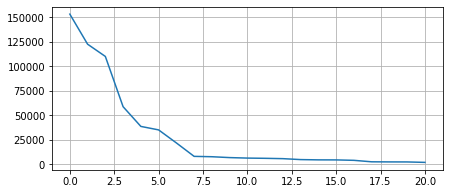

In [35]:
show_partial_plot(1,20, figsize=(7,3))

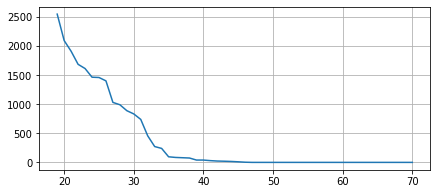

In [36]:
show_partial_plot(20,70, figsize=(7,3))

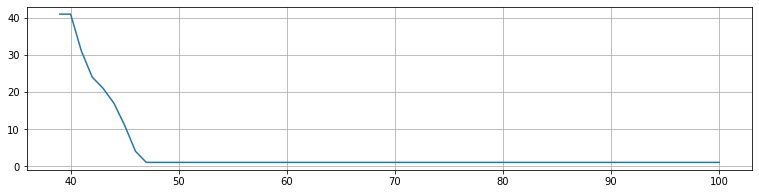

In [37]:
show_partial_plot(40,100, figsize=(13,3))

## Ability 중 'Attack' event count
- 게임별 훈련 이벤트는 거의 필수적으로 존재한다
- 'Attack'이 포함된 이벤트를 P0 P1 으로 카운트를 해서 칼럼을 추가한다.
- Attack 이벤트가 양쪽 모두 없는 게임이 존재한다 == 뭔가 잘못된 극소수 게임이 존재함

In [38]:
%%time
countAll_attack = df_test.game_id[
                     (df_test.event == 'Ability') &
                     (df_test.event_contents.str.contains('Attack'))
                ].value_counts()


countP0_attack = df_test.game_id[
                     (df_test.event == 'Ability') &
                     (df_test.event_contents.str.contains('Attack')) &
                     (df_test.player == 0)
                ].value_counts()


countP1_attack = df_test.game_id[
                     (df_test.event == 'Ability') &
                     (df_test.event_contents.str.contains('Attack')) &
                     (df_test.player == 1)
                ].value_counts()

CPU times: user 43.4 s, sys: 1.39 s, total: 44.7 s
Wall time: 31.8 s


In [39]:
"""
# 갯수 카운트 ...ALL=(33687,)
"""
df_attack_all = pd.DataFrame(countAll_attack)
df_attack_all = df_attack_all.rename(columns={'game_id' : 'attack_all'})
df_attack_all.insert(0, 'game_id', df_attack_all.index.values)
df_attack_all.index = df_attack_all['game_id'].copy()

df_attack_all['attack_all'] = df_attack_all['attack_all'].astype(np.float64) 

df_attack_P0 = pd.DataFrame(countP0_attack)
df_attack_P0 = df_attack_P0.rename(columns={'game_id' : 'attack_P0'})
df_attack_P0.insert(0, 'game_id', df_attack_P0.index.values)
df_attack_P0.index = df_attack_P0['game_id'].copy()

df_attack_P1 = pd.DataFrame(countP1_attack)
df_attack_P1 = df_attack_P1.rename(columns={'game_id' : 'attack_P1'})
df_attack_P1.insert(0, 'game_id', df_attack_P1.index.values)
df_attack_P1.index = df_attack_P1['game_id'].copy()

In [40]:
df_attack_P0

,game_id,attack_P0
game_id,,
41566,41566,80
52013,52013,79
40027,40027,71
47279,47279,70
40571,40571,70
...,...,...
55275,55275,1
45092,45092,1
45978,45978,1


In [41]:
df_2= pd.concat([df_attack_all, df_attack_P0, df_attack_P1], axis=1, join='outer')
columns = ['attack_all', 'attack_P0', 'attack_P1',]
df_2 = df_2[columns]
df_2 = df_2.fillna(0.0)
df_2['check_attack'] = df_2['attack_P0'] + df_2['attack_P1']

df_2.shape   # (33687, 4)
df_2

,attack_all,attack_P0,attack_P1,check_attack
game_id,,,,
38872,7.0,5.0,2.0,7.0
38874,13.0,9.0,4.0,13.0
38875,30.0,13.0,17.0,30.0
38879,52.0,36.0,16.0,52.0
38880,37.0,12.0,25.0,37.0
...,...,...,...,...
55653,14.0,13.0,1.0,14.0
55654,17.0,9.0,8.0,17.0
55655,26.0,8.0,18.0,26.0


In [42]:
"""
# 합이 맞지 않는다 왜? 그런지 모르겠다.. 안되면 책섬을 트레인올로 바꿔야..
# 조회를 해보니 NaN이 있다 = 0.0으로 바꿔주면 맞을것 같음! --수정완료!
"""

(df_2.attack_all == df_2.check_attack).value_counts()

True    14492
dtype: int64

In [43]:
dfs = [df_1, df_2]
df_3 = pd.concat(dfs, axis=1, join='outer')

cols = ['train_P0','attack_P0','train_P1','attack_P1','train_all','attack_all',]
df_3 = df_3[cols]

df_3.shape       # (38862, 6)
df_3

,train_P0,attack_P0,train_P1,attack_P1,train_all,attack_all
game_id,,,,,,
38872,13.0,5.0,16.0,2.0,29.0,7.0
38873,18.0,NaN,17.0,NaN,35.0,NaN
38874,12.0,9.0,6.0,4.0,18.0,13.0
38875,29.0,13.0,23.0,17.0,52.0,30.0
38876,4.0,NaN,4.0,NaN,8.0,NaN
...,...,...,...,...,...,...
55654,18.0,9.0,22.0,8.0,40.0,17.0
55655,23.0,8.0,21.0,18.0,44.0,26.0
55656,8.0,0.0,9.0,6.0,17.0,6.0


In [44]:
cols_test = ['game_id', 'time', 'P0_species', 'P0_Ability',
       'P0_AddToControlGroup', 'P0_Camera', 'P0_ControlGroup',
       'P0_GetControlGroup', 'P0_Right Click', 'P0_Selection',
       'P0_SetControlGroup', 'P1_species', 'P1_Ability',
       'P1_AddToControlGroup', 'P1_Camera', 'P1_ControlGroup',
       'P1_GetControlGroup', 'P1_Right Click', 'P1_Selection',
       'P1_SetControlGroup', 'delta_Ability', 'delta_AddToControlGroup',
       'delta_Camera', 'delta_ControlGroup', 'delta_GetControlGroup',
       'delta_Right Click', 'delta_Selection', 'delta_SetControlGroup']

cols_df_time = ['game_id', 'time']
cols_df_null = ['game_id', 'P0_null_total', 'P1_null_total', 'delta_null_total']
cols_df_3 = ['train_P0', 'attack_P0', 'train_P1', 'attack_P1', 'train_all',
       'attack_all']

In [45]:
cols = ['time', 
        'P0_null_total', 
        'P1_null_total', 
        'delta_null_total', 
        
        'train_P0',
        'train_P1', 
        #'delta_train',
        #'train_all', 
        
        'attack_P0',
        'attack_P1',
        #'delta_attack',
        #'attack_all',
       ]

rename_dict = {
        #'time_consum'     : 'time',
        'P0_null_total'   : 'p0_null',
        'P1_null_total'   : 'p1_null',
        'delta_null_total': 'delta_null',
    
        'train_P0'        : 'p0_train',
        'train_P1'        : 'p1_train',
        #'train_all'       : 'sum_train',
    
        'attack_P0'       : 'p0_attack',
        'attack_P1'       : 'p1_attack',
        #'attack_all'      : 'sum_attack',
    }

In [46]:
dfs = [df_time, df_null, df_3]
df_remake = pd.concat(dfs, axis=1, join='outer')

df_remake.shape     # (38872, 12)
df_remake = df_remake[cols]
df_remake = df_remake.rename(columns=rename_dict)
df_remake.insert(6, 'delta_train', df_remake.p0_train - df_remake.p1_train  )
df_remake.insert(9,'delta_attack',df_remake.p0_attack - df_remake.p1_attack  )

df_remake.shape     # (38872, 10)
df_remake

,time,p0_null,p1_null,delta_null,p0_train,p1_train,delta_train,p0_attack,p1_attack,delta_attack
game_id,,,,,,,,,,
38872,7.06,15.0,47.0,-32.0,13.0,16.0,-3.0,5.0,2.0,3.0
38873,6.07,22.0,128.0,-106.0,18.0,17.0,1.0,NaN,NaN,NaN
38874,4.41,70.0,431.0,-361.0,12.0,6.0,6.0,9.0,4.0,5.0
38875,7.58,272.0,27.0,245.0,29.0,23.0,6.0,13.0,17.0,-4.0
38876,2.50,391.0,2.0,389.0,4.0,4.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
55654,6.14,701.0,544.0,157.0,18.0,22.0,-4.0,9.0,8.0,1.0
55655,9.58,224.0,52.0,172.0,23.0,21.0,2.0,8.0,18.0,-10.0
55656,6.24,1.0,30.0,-29.0,8.0,9.0,-1.0,0.0,6.0,-6.0


In [47]:
df_select_null = df_select_null[['P0_select_null','P1_select_null','delta_select_null']]
df_select_null = df_select_null.rename(columns = {
    'P0_select_null' : 'p0_select_null',
    'P1_select_null' : 'p1_select_null',    
})
df_select_null

,p0_select_null,p1_select_null,delta_select_null
game_id,,,
38872,4.0,3.0,1.0
38873,7.0,1.0,6.0
38874,1.0,2.0,-1.0
38875,9.0,11.0,-2.0
38878,0.0,10.0,-10.0
...,...,...,...
55653,16.0,2.0,14.0
55654,24.0,4.0,20.0
55655,7.0,11.0,-4.0


In [48]:
dfs = [df_remake, df_select_null]
df_remake = pd.concat(dfs, axis=1, join='outer')
df_remake

,time,p0_null,p1_null,delta_null,p0_train,p1_train,delta_train,p0_attack,p1_attack,delta_attack,p0_select_null,p1_select_null,delta_select_null
game_id,,,,,,,,,,,,,
38872,7.06,15.0,47.0,-32.0,13.0,16.0,-3.0,5.0,2.0,3.0,4.0,3.0,1.0
38873,6.07,22.0,128.0,-106.0,18.0,17.0,1.0,NaN,NaN,NaN,7.0,1.0,6.0
38874,4.41,70.0,431.0,-361.0,12.0,6.0,6.0,9.0,4.0,5.0,1.0,2.0,-1.0
38875,7.58,272.0,27.0,245.0,29.0,23.0,6.0,13.0,17.0,-4.0,9.0,11.0,-2.0
38876,2.50,391.0,2.0,389.0,4.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55654,6.14,701.0,544.0,157.0,18.0,22.0,-4.0,9.0,8.0,1.0,24.0,4.0,20.0
55655,9.58,224.0,52.0,172.0,23.0,21.0,2.0,8.0,18.0,-10.0,7.0,11.0,-4.0
55656,6.24,1.0,30.0,-29.0,8.0,9.0,-1.0,0.0,6.0,-6.0,6.0,6.0,0.0


In [49]:
show_infoDF_from(df_remake)

*** DATA SHAPE = [ 16,787 x 13 ]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16787 entries, 38872 to 55658
Data columns (total 13 columns):
time                 16787 non-null float64
p0_null              16787 non-null float64
p1_null              16787 non-null float64
delta_null           16787 non-null float64
p0_train             16782 non-null float64
p1_train             16782 non-null float64
delta_train          16782 non-null float64
p0_attack            14492 non-null float64
p1_attack            14492 non-null float64
delta_attack         14492 non-null float64
p0_select_null       16045 non-null float64
p1_select_null       16045 non-null float64
delta_select_null    16045 non-null float64
dtypes: float64(13)
memory usage: 1.8 MB
None

               time       p0_null       p1_null    delta_null      p0_train  \
count  16787.000000  16787.000000  16787.000000  16787.000000  16782.000000   
mean       7.263197    135.749926    133.390779      2.359147     18.733286 

In [50]:
df_remake.isna().any()

time                 False
p0_null              False
p1_null              False
delta_null           False
p0_train              True
p1_train              True
delta_train           True
p0_attack             True
p1_attack             True
delta_attack          True
p0_select_null        True
p1_select_null        True
delta_select_null     True
dtype: bool

In [51]:
df_remake = df_remake.fillna(0.0)
df_remake.isna().any()

time                 False
p0_null              False
p1_null              False
delta_null           False
p0_train             False
p1_train             False
delta_train          False
p0_attack            False
p1_attack            False
delta_attack         False
p0_select_null       False
p1_select_null       False
delta_select_null    False
dtype: bool

In [52]:
show_infoDF_from(df_remake)

*** DATA SHAPE = [ 16,787 x 13 ]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16787 entries, 38872 to 55658
Data columns (total 13 columns):
time                 16787 non-null float64
p0_null              16787 non-null float64
p1_null              16787 non-null float64
delta_null           16787 non-null float64
p0_train             16787 non-null float64
p1_train             16787 non-null float64
delta_train          16787 non-null float64
p0_attack            16787 non-null float64
p1_attack            16787 non-null float64
delta_attack         16787 non-null float64
p0_select_null       16787 non-null float64
p1_select_null       16787 non-null float64
delta_select_null    16787 non-null float64
dtypes: float64(13)
memory usage: 1.8 MB
None

               time       p0_null       p1_null    delta_null      p0_train  \
count  16787.000000  16787.000000  16787.000000  16787.000000  16787.000000   
mean       7.263197    135.749926    133.390779      2.359147     18.727706 

# P0 winning weight 추가하기 
- df_new_rate04 (pooling 4 를 이용 = 40초 간격 승률계산

In [53]:
show_ls(dir_base + remake)

False
DIR_TARGET=/home/yk/0325_Starcraft/competition/c03_starcraft_prediction/data_remake
/home/yk/0325_Starcraft/competition/c03_starcraft_prediction/data_remake/
----------------------------------------
  01. .ipynb_checkpoints
  02. accumujated_winning_rate_per_time.csv
  03. accumulated_winning_rate_per_time.csv
  04. df_new_rate04_correct.csv
  05. df_win_rate_every_10sec.csv
  06. df_win_rate_every_20sec.csv
  07. df_win_rate_every_40sec.csv
  08. df_xtest_remake.csv
  09. df_xtrain_remake.csv
  10. df_xtrain_remake_final.csv
  11. df_ytrain_remake.csv


In [54]:
df_new_rate04 = pd.read_csv('df_new_rate04_correct.csv', index_col='Unnamed: 0')
df_new_rate04 = df_new_rate04.rename(columns={'time_consume':'time_span'})
df_new_rate04

,time_span,delta_rate_pool4
0,0.4,10.769231
1,1.1,12.888889
2,1.5,5.286344
3,2.2,8.641975
4,2.6,7.631318
5,3.3,5.546493
6,4.0,6.330837
7,4.4,3.209020
8,5.1,1.980831
9,5.5,2.459397


In [55]:
"""
# 람다펑션에 넣을 헬퍼함수를 정의한다
# p0_weight 칼럼을 만들기 위한 함수
"""
dict_rate04 = df_new_rate04.to_dict()

def get_index(time, dict_rate):
    i = 0
    while i <= len(dict_rate['time_span']):
        time_seg = dict_rate['time_span'][i]
        if time < time_seg:
            weight = dict_rate['delta_rate_pool4'][i]
            # print(f"{time} is less than {time_seg}, Weight = {weight}")  # FOR TEST!
            return weight
            break
        i += 1
    return False

_ = get_index(0.2, dict_rate04)

times = list(df_remake.time[:10])
weights = []

for time in times:
    weights.append(get_index(time, dict_rate04))

weights

[2.118644068,
 4.0,
 1.9808306709999999,
 4.4692737430000005,
 7.631318137,
 7.631318137,
 6.330837304,
 0.308153577,
 3.374578178,
 0.308153577]

In [56]:
df_remake['p0_weight'] = df_remake['time'].apply(lambda x: get_index(x, dict_rate04))
df_remake

,time,p0_null,p1_null,delta_null,p0_train,p1_train,delta_train,p0_attack,p1_attack,delta_attack,p0_select_null,p1_select_null,delta_select_null,p0_weight
game_id,,,,,,,,,,,,,,
38872,7.06,15.0,47.0,-32.0,13.0,16.0,-3.0,5.0,2.0,3.0,4.0,3.0,1.0,2.118644
38873,6.07,22.0,128.0,-106.0,18.0,17.0,1.0,0.0,0.0,0.0,7.0,1.0,6.0,4.000000
38874,4.41,70.0,431.0,-361.0,12.0,6.0,6.0,9.0,4.0,5.0,1.0,2.0,-1.0,1.980831
38875,7.58,272.0,27.0,245.0,29.0,23.0,6.0,13.0,17.0,-4.0,9.0,11.0,-2.0,4.469274
38876,2.50,391.0,2.0,389.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.631318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55654,6.14,701.0,544.0,157.0,18.0,22.0,-4.0,9.0,8.0,1.0,24.0,4.0,20.0,4.000000
55655,9.58,224.0,52.0,172.0,23.0,21.0,2.0,8.0,18.0,-10.0,7.0,11.0,-4.0,0.308154
55656,6.24,1.0,30.0,-29.0,8.0,9.0,-1.0,0.0,6.0,-6.0,6.0,6.0,0.0,2.971175


In [57]:
df_remake.isna().any()

time                 False
p0_null              False
p1_null              False
delta_null           False
p0_train             False
p1_train             False
delta_train          False
p0_attack            False
p1_attack            False
delta_attack         False
p0_select_null       False
p1_select_null       False
delta_select_null    False
p0_weight            False
dtype: bool

In [58]:
show_infoDF_from(df_remake)

*** DATA SHAPE = [ 16,787 x 14 ]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16787 entries, 38872 to 55658
Data columns (total 14 columns):
time                 16787 non-null float64
p0_null              16787 non-null float64
p1_null              16787 non-null float64
delta_null           16787 non-null float64
p0_train             16787 non-null float64
p1_train             16787 non-null float64
delta_train          16787 non-null float64
p0_attack            16787 non-null float64
p1_attack            16787 non-null float64
delta_attack         16787 non-null float64
p0_select_null       16787 non-null float64
p1_select_null       16787 non-null float64
delta_select_null    16787 non-null float64
p0_weight            16787 non-null float64
dtypes: float64(14)
memory usage: 1.9 MB
None

               time       p0_null       p1_null    delta_null      p0_train  \
count  16787.000000  16787.000000  16787.000000  16787.000000  16787.000000   
mean       7.263197    135.74992

In [63]:
df_xtest

,game_id,time,P0_species,P0_Ability,P0_AddToControlGroup,P0_Camera,P0_ControlGroup,P0_GetControlGroup,P0_Right Click,P0_Selection,...,P1_Selection,P1_SetControlGroup,delta_Ability,delta_AddToControlGroup,delta_Camera,delta_ControlGroup,delta_GetControlGroup,delta_Right Click,delta_Selection,delta_SetControlGroup
game_id,,,,,,,,,,,,,,,,,,,,,
38872,38872,NaN,1,31.0,1.0,232.0,0.0,9.0,241.0,52.0,...,41.0,0.0,-7.0,-3.0,-235.0,0.0,-34.0,119.0,11.0,5.0
38873,38873,NaN,2,34.0,0.0,200.0,4.0,18.0,51.0,114.0,...,19.0,5.0,6.0,-1.0,54.0,4.0,-104.0,-17.0,95.0,-5.0
38874,38874,NaN,0,33.0,0.0,245.0,0.0,63.0,79.0,42.0,...,36.0,5.0,4.0,0.0,25.0,0.0,-363.0,-29.0,6.0,2.0
38875,38875,NaN,0,95.0,8.0,515.0,0.0,255.0,218.0,123.0,...,99.0,2.0,37.0,7.0,158.0,0.0,231.0,-104.0,24.0,7.0
38876,38876,NaN,2,7.0,2.0,129.0,0.0,387.0,30.0,25.0,...,35.0,1.0,-1.0,2.0,-32.0,0.0,386.0,23.0,-10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55654,55654,NaN,2,37.0,2.0,258.0,0.0,693.0,136.0,186.0,...,108.0,14.0,-16.0,-13.0,-60.0,0.0,178.0,-13.0,78.0,-8.0
55655,55655,NaN,2,62.0,0.0,810.0,0.0,217.0,158.0,317.0,...,103.0,0.0,-13.0,-2.0,172.0,0.0,167.0,-16.0,214.0,7.0
55656,55656,NaN,1,14.0,0.0,330.0,0.0,0.0,106.0,67.0,...,52.0,0.0,-22.0,0.0,2.0,-2.0,-28.0,-145.0,15.0,1.0


In [67]:
dfs = [df_xtest, df_remake]
df_remake_01 = pd.concat(dfs, axis=1, join='outer')
df_remake_01

,game_id,time,P0_species,P0_Ability,P0_AddToControlGroup,P0_Camera,P0_ControlGroup,P0_GetControlGroup,P0_Right Click,P0_Selection,...,p0_train,p1_train,delta_train,p0_attack,p1_attack,delta_attack,p0_select_null,p1_select_null,delta_select_null,p0_weight
game_id,,,,,,,,,,,,,,,,,,,,,
38872,38872,NaN,1,31.0,1.0,232.0,0.0,9.0,241.0,52.0,...,13.0,16.0,-3.0,5.0,2.0,3.0,4.0,3.0,1.0,2.118644
38873,38873,NaN,2,34.0,0.0,200.0,4.0,18.0,51.0,114.0,...,18.0,17.0,1.0,0.0,0.0,0.0,7.0,1.0,6.0,4.000000
38874,38874,NaN,0,33.0,0.0,245.0,0.0,63.0,79.0,42.0,...,12.0,6.0,6.0,9.0,4.0,5.0,1.0,2.0,-1.0,1.980831
38875,38875,NaN,0,95.0,8.0,515.0,0.0,255.0,218.0,123.0,...,29.0,23.0,6.0,13.0,17.0,-4.0,9.0,11.0,-2.0,4.469274
38876,38876,NaN,2,7.0,2.0,129.0,0.0,387.0,30.0,25.0,...,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.631318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55654,55654,NaN,2,37.0,2.0,258.0,0.0,693.0,136.0,186.0,...,18.0,22.0,-4.0,9.0,8.0,1.0,24.0,4.0,20.0,4.000000
55655,55655,NaN,2,62.0,0.0,810.0,0.0,217.0,158.0,317.0,...,23.0,21.0,2.0,8.0,18.0,-10.0,7.0,11.0,-4.0,0.308154
55656,55656,NaN,1,14.0,0.0,330.0,0.0,0.0,106.0,67.0,...,8.0,9.0,-1.0,0.0,6.0,-6.0,6.0,6.0,0.0,2.971175


In [68]:
df_time

,game_id,time
game_id,,
38872,38872,7.06
38873,38873,6.07
38874,38874,4.41
38875,38875,7.58
38876,38876,2.50
...,...,...
55654,55654,6.14
55655,55655,9.58
55656,55656,6.24


In [65]:
# 쓸데없는 feature 는 삭제한다.
# del df_remake_01['time']

In [69]:
df_remake_01['time'] = df_time['time'].copy()
df_remake_01

,game_id,time,P0_species,P0_Ability,P0_AddToControlGroup,P0_Camera,P0_ControlGroup,P0_GetControlGroup,P0_Right Click,P0_Selection,...,p0_train,p1_train,delta_train,p0_attack,p1_attack,delta_attack,p0_select_null,p1_select_null,delta_select_null,p0_weight
game_id,,,,,,,,,,,,,,,,,,,,,
38872,38872,7.06,1,31.0,1.0,232.0,0.0,9.0,241.0,52.0,...,13.0,16.0,-3.0,5.0,2.0,3.0,4.0,3.0,1.0,2.118644
38873,38873,6.07,2,34.0,0.0,200.0,4.0,18.0,51.0,114.0,...,18.0,17.0,1.0,0.0,0.0,0.0,7.0,1.0,6.0,4.000000
38874,38874,4.41,0,33.0,0.0,245.0,0.0,63.0,79.0,42.0,...,12.0,6.0,6.0,9.0,4.0,5.0,1.0,2.0,-1.0,1.980831
38875,38875,7.58,0,95.0,8.0,515.0,0.0,255.0,218.0,123.0,...,29.0,23.0,6.0,13.0,17.0,-4.0,9.0,11.0,-2.0,4.469274
38876,38876,2.50,2,7.0,2.0,129.0,0.0,387.0,30.0,25.0,...,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.631318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55654,55654,6.14,2,37.0,2.0,258.0,0.0,693.0,136.0,186.0,...,18.0,22.0,-4.0,9.0,8.0,1.0,24.0,4.0,20.0,4.000000
55655,55655,9.58,2,62.0,0.0,810.0,0.0,217.0,158.0,317.0,...,23.0,21.0,2.0,8.0,18.0,-10.0,7.0,11.0,-4.0,0.308154
55656,55656,6.24,1,14.0,0.0,330.0,0.0,0.0,106.0,67.0,...,8.0,9.0,-1.0,0.0,6.0,-6.0,6.0,6.0,0.0,2.971175


In [66]:
df_remake_01.isna().any()

game_id                    False
P0_species                 False
P0_Ability                 False
P0_AddToControlGroup       False
P0_Camera                  False
P0_ControlGroup            False
P0_GetControlGroup         False
P0_Right Click             False
P0_Selection               False
P0_SetControlGroup         False
P1_species                 False
P1_Ability                 False
P1_AddToControlGroup       False
P1_Camera                  False
P1_ControlGroup            False
P1_GetControlGroup         False
P1_Right Click             False
P1_Selection               False
P1_SetControlGroup         False
delta_Ability              False
delta_AddToControlGroup    False
delta_Camera               False
delta_ControlGroup         False
delta_GetControlGroup      False
delta_Right Click          False
delta_Selection            False
delta_SetControlGroup      False
p0_null                    False
p1_null                    False
delta_null                 False
p0_train  

In [73]:
df_remake_01.insert(1, 'time_spend', df_time['time'])

In [74]:
del(df_remake_01['time'])

In [75]:
df_remake_01

,game_id,time_spend,P0_species,P0_Ability,P0_AddToControlGroup,P0_Camera,P0_ControlGroup,P0_GetControlGroup,P0_Right Click,P0_Selection,...,p0_train,p1_train,delta_train,p0_attack,p1_attack,delta_attack,p0_select_null,p1_select_null,delta_select_null,p0_weight
game_id,,,,,,,,,,,,,,,,,,,,,
38872,38872,7.06,1,31.0,1.0,232.0,0.0,9.0,241.0,52.0,...,13.0,16.0,-3.0,5.0,2.0,3.0,4.0,3.0,1.0,2.118644
38873,38873,6.07,2,34.0,0.0,200.0,4.0,18.0,51.0,114.0,...,18.0,17.0,1.0,0.0,0.0,0.0,7.0,1.0,6.0,4.000000
38874,38874,4.41,0,33.0,0.0,245.0,0.0,63.0,79.0,42.0,...,12.0,6.0,6.0,9.0,4.0,5.0,1.0,2.0,-1.0,1.980831
38875,38875,7.58,0,95.0,8.0,515.0,0.0,255.0,218.0,123.0,...,29.0,23.0,6.0,13.0,17.0,-4.0,9.0,11.0,-2.0,4.469274
38876,38876,2.50,2,7.0,2.0,129.0,0.0,387.0,30.0,25.0,...,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.631318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55654,55654,6.14,2,37.0,2.0,258.0,0.0,693.0,136.0,186.0,...,18.0,22.0,-4.0,9.0,8.0,1.0,24.0,4.0,20.0,4.000000
55655,55655,9.58,2,62.0,0.0,810.0,0.0,217.0,158.0,317.0,...,23.0,21.0,2.0,8.0,18.0,-10.0,7.0,11.0,-4.0,0.308154
55656,55656,6.24,1,14.0,0.0,330.0,0.0,0.0,106.0,67.0,...,8.0,9.0,-1.0,0.0,6.0,-6.0,6.0,6.0,0.0,2.971175


In [76]:
show_infoDF_from(df_remake_01)

*** DATA SHAPE = [ 16,787 x 41 ]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16787 entries, 38872 to 55658
Data columns (total 41 columns):
game_id                    16787 non-null int64
time_spend                 16787 non-null float64
P0_species                 16787 non-null int64
P0_Ability                 16787 non-null float64
P0_AddToControlGroup       16787 non-null float64
P0_Camera                  16787 non-null float64
P0_ControlGroup            16787 non-null float64
P0_GetControlGroup         16787 non-null float64
P0_Right Click             16787 non-null float64
P0_Selection               16787 non-null float64
P0_SetControlGroup         16787 non-null float64
P1_species                 16787 non-null int64
P1_Ability                 16787 non-null float64
P1_AddToControlGroup       16787 non-null float64
P1_Camera                  16787 non-null float64
P1_ControlGroup            16787 non-null float64
P1_GetControlGroup         16787 non-null float64
P1_Right 

# final xtest data set 저장
- final xtest = 최종시험!
- final ytest, = 값은 없음! (답안지)

In [77]:
df_remake_01.to_csv(filename_remake_final)